###COVID 19

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.shape

(49068, 10)

In [ ]:
df.rename(columns={'Province/State':'state',
           'Country/Region':'country'}, inplace = True)

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df['Date'].max()

'2020-07-27'

In [ ]:
df[df['Date']=='2020-07-27']

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
top = df[df['Date']=='2020-07-27']

In [ ]:
top.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [ ]:
top.groupby(by='country')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


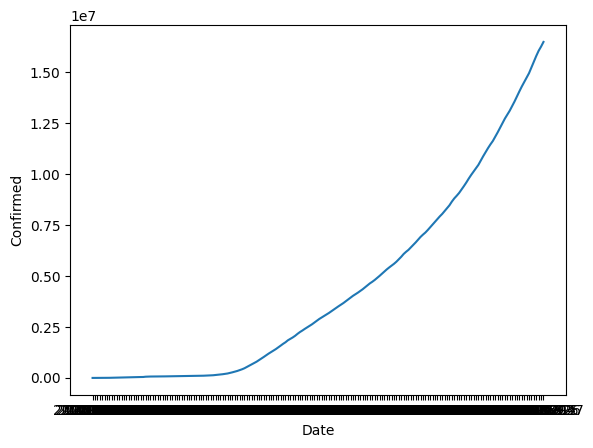

In [ ]:
sns.lineplot(data=confirmed, x='Date', y='Confirmed')
plt.show()

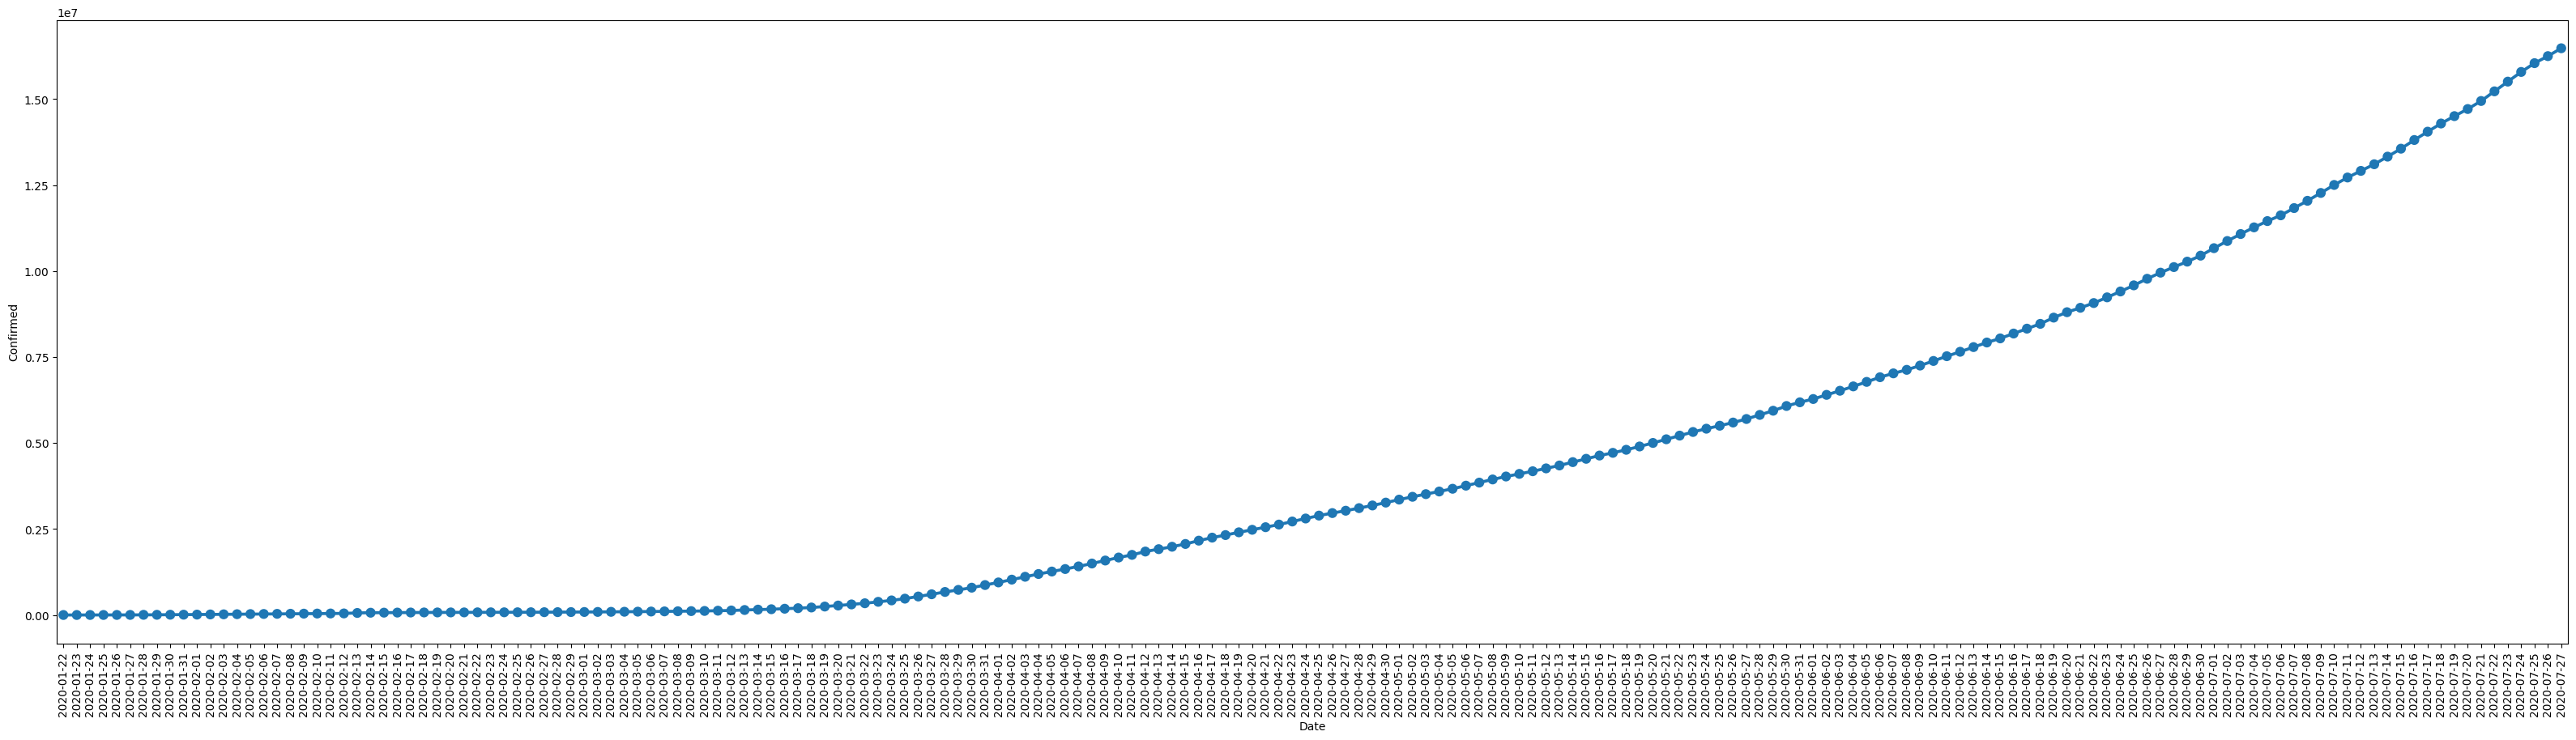

In [ ]:
plt.figure(figsize=(40,10))
sns.pointplot(data=confirmed, x='Date', y='Confirmed')
plt.xticks(rotation=90)
plt.show()

##TOP 10 countries with the most recovered cases

In [ ]:
top_10_recovered = df.groupby(by='country')['Recovered'].sum().sort_values(ascending = False).head(10).reset_index()

In [ ]:
top_10_recovered

,country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


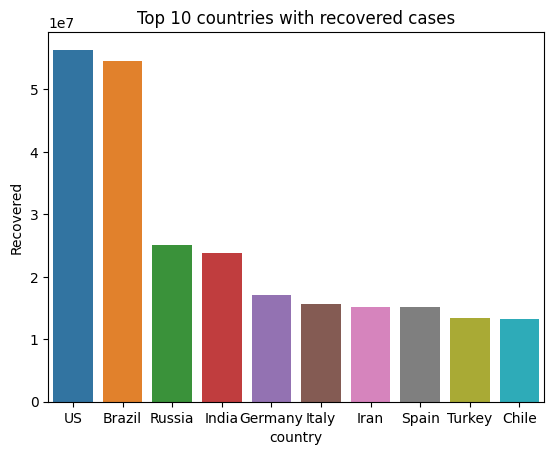

In [ ]:
sns.barplot(data = top_10_recovered, x = 'country', y='Recovered')
plt.title('Top 10 countries with recovered cases')
plt.show()

##Top 10 countries with deaths

In [ ]:
top_10_deaths = df.groupby(by='country')['Deaths'].sum().sort_values(ascending = False).head(10).reset_index()

In [ ]:
top_10_deaths

,country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


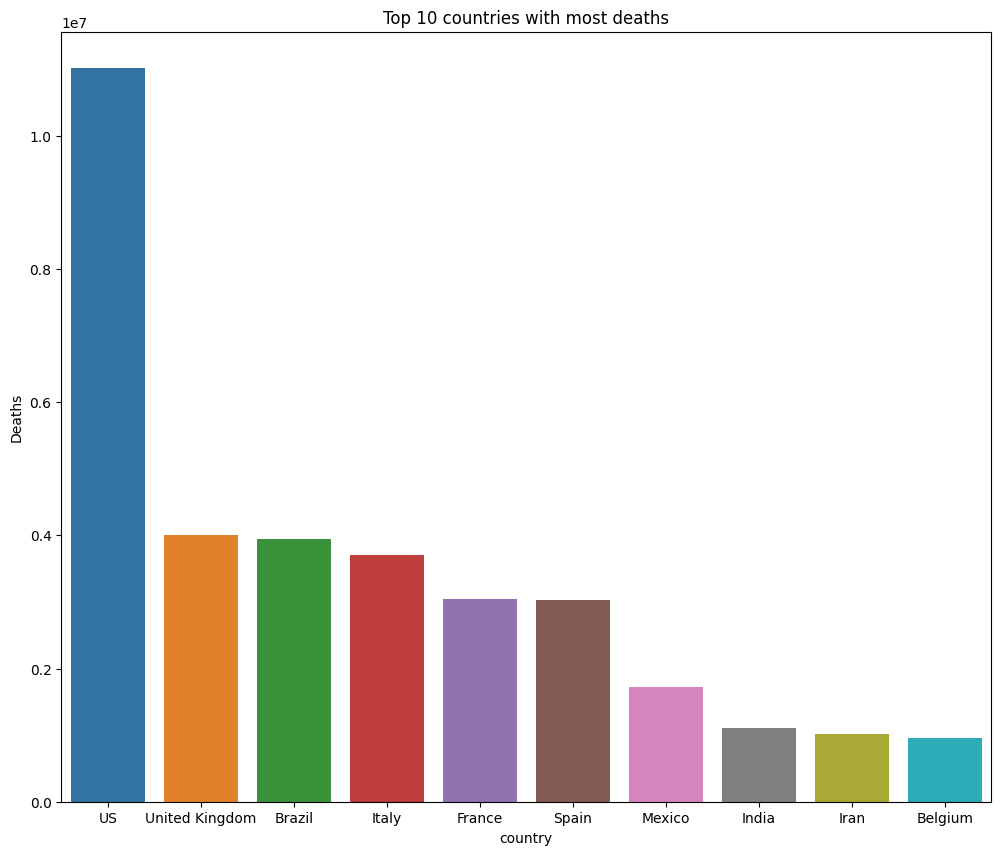

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = top_10_deaths, x = 'country', y = 'Deaths')
plt.title('Top 10 countries with most deaths')
plt.show()

##Top 10 countries with most active cases

In [ ]:
top_10_active = df.groupby(by='country')['Active'].sum().sort_values(ascending = False).head(10).reset_index()

In [ ]:
top_10_active

,country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


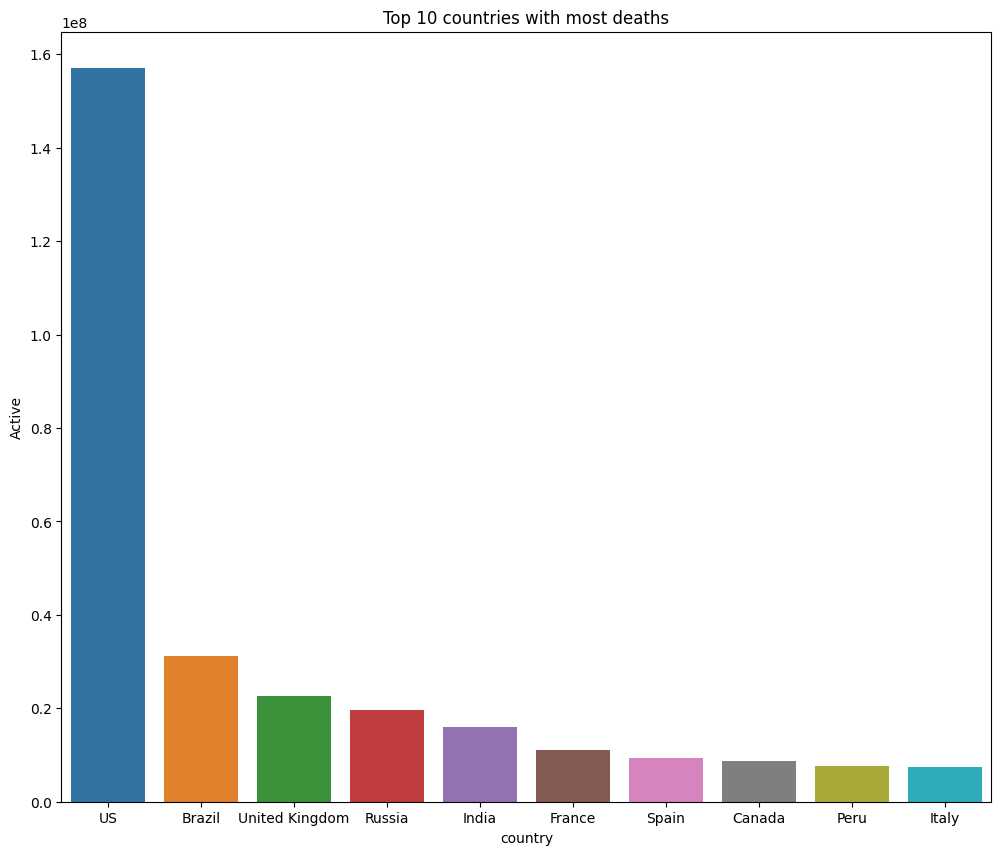

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = top_10_active, x = 'country', y = 'Active')
plt.title('Top 10 countries with most deaths')
plt.show()

##Country based analysis

In [ ]:
us = df[df['country'] == 'US']

In [ ]:
us

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [ ]:
us = us.groupby(by='Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [ ]:
us

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [ ]:
china = df[df['country'] == 'China']

In [ ]:
china = china.groupby(by='Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [ ]:
china

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [ ]:
india = df[df['country']=='India']

In [ ]:
india = india.groupby(by='Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [ ]:
india

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


## Compare these countries on the basis of death cases

Text(0, 0.5, 'No. of Deaths')

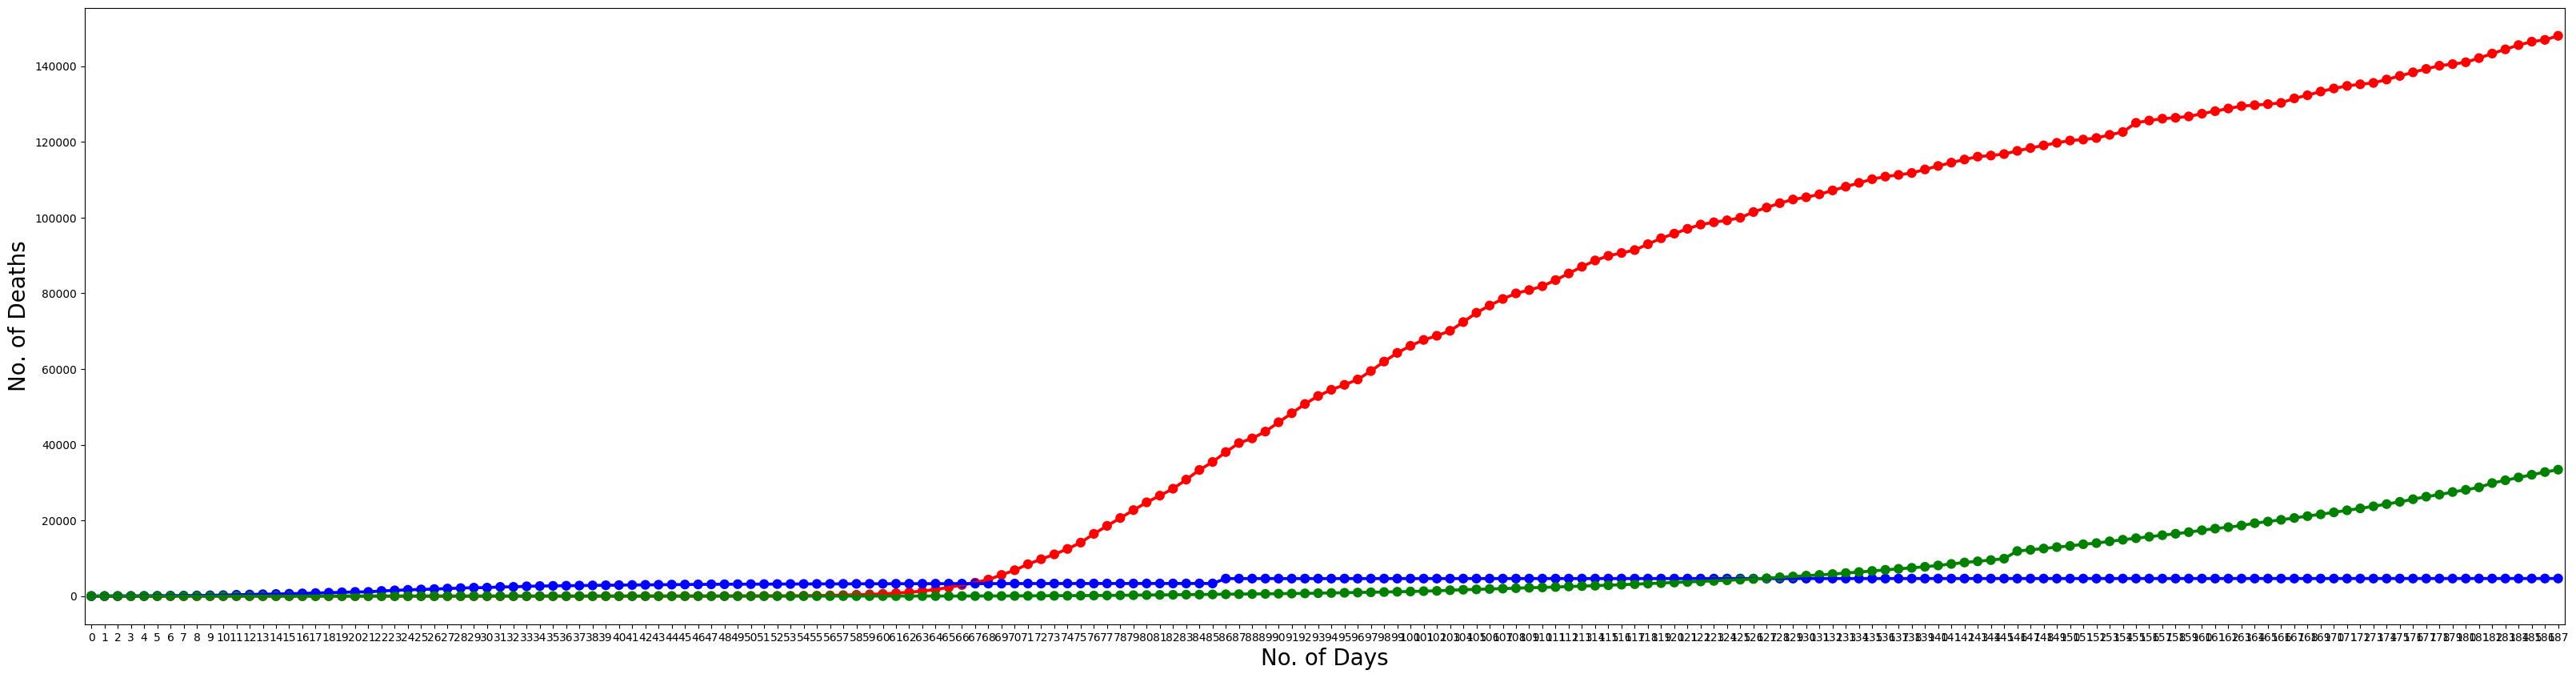

In [ ]:
plt.figure(figsize=(40,10))

sns.pointplot(x=us.index, y = us.Deaths, color = 'Red')
sns.pointplot(x=china.index, y=china.Deaths, color = 'Blue')
sns.pointplot(x=india.index, y=india.Deaths, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Deaths', fontsize = 20)

In [ ]:
### Compare countries on the basis of recovered

Text(0, 0.5, 'No. of Recovered')

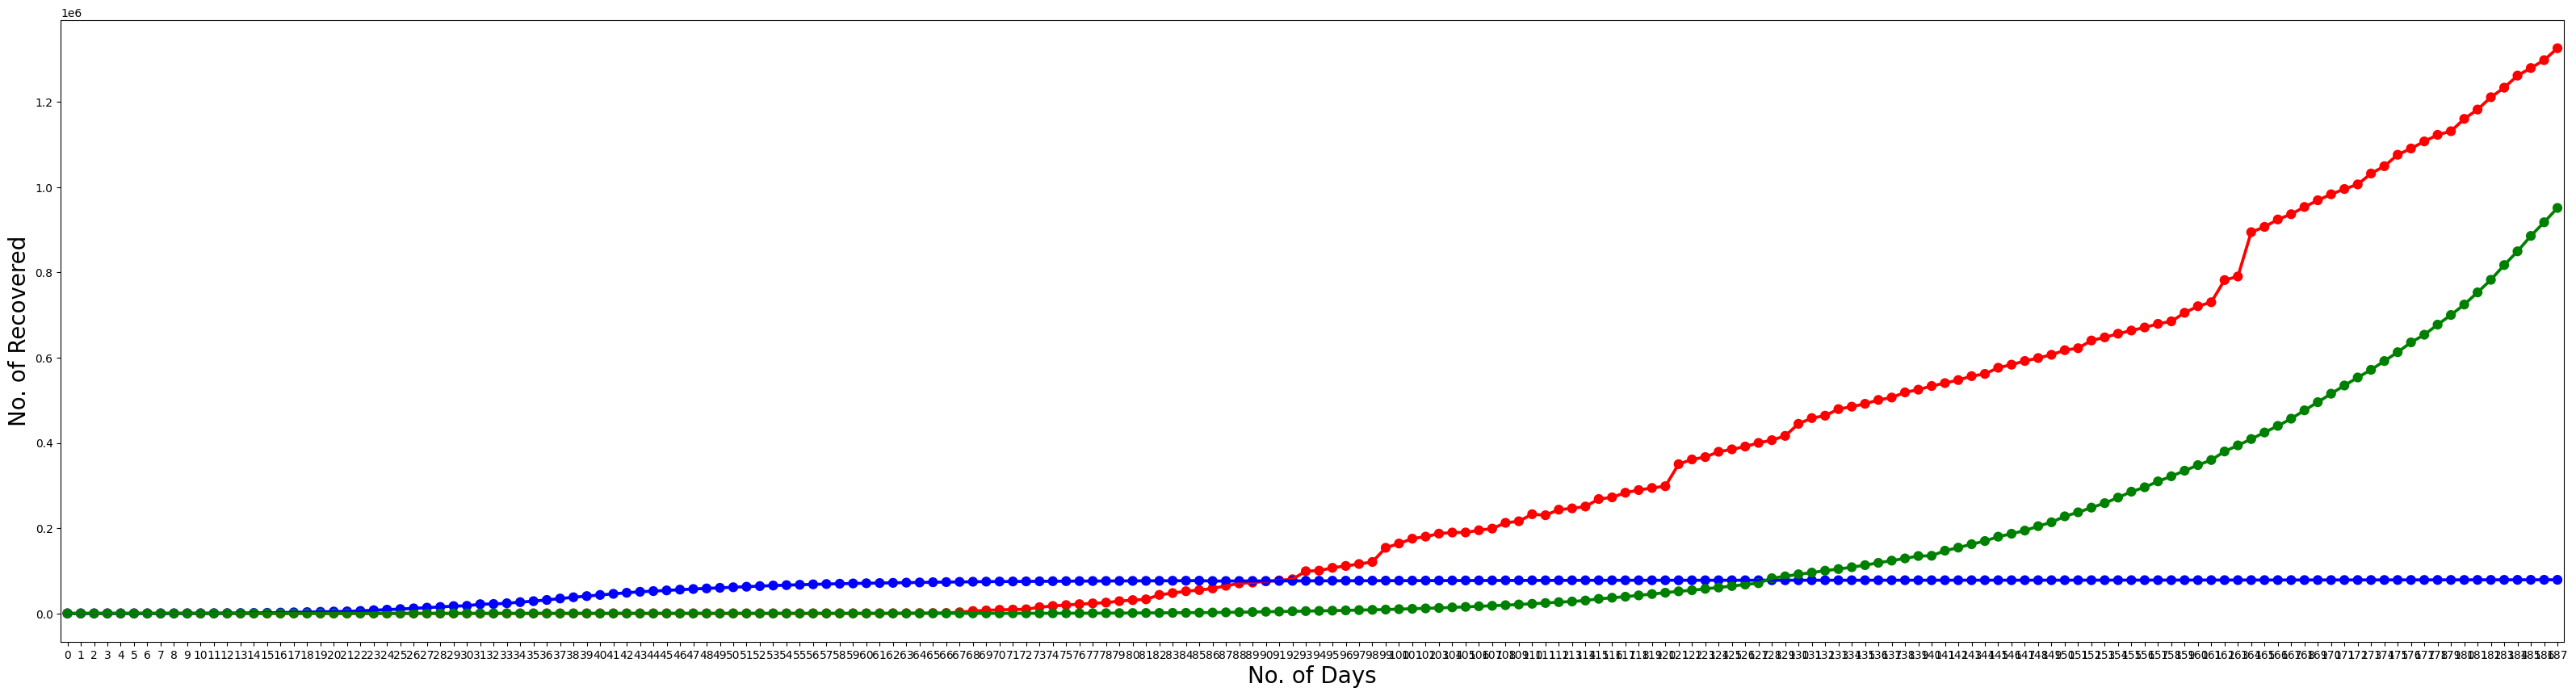

In [ ]:
plt.figure(figsize=(40,10))

sns.pointplot(x=us.index, y = us.Recovered, color = 'Red')
sns.pointplot(x=china.index, y=china.Recovered, color = 'Blue')
sns.pointplot(x=india.index, y=india.Recovered, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

In [ ]:
### Compare countries on the basis of Confirmed

Text(0, 0.5, 'No. of Confirmed')

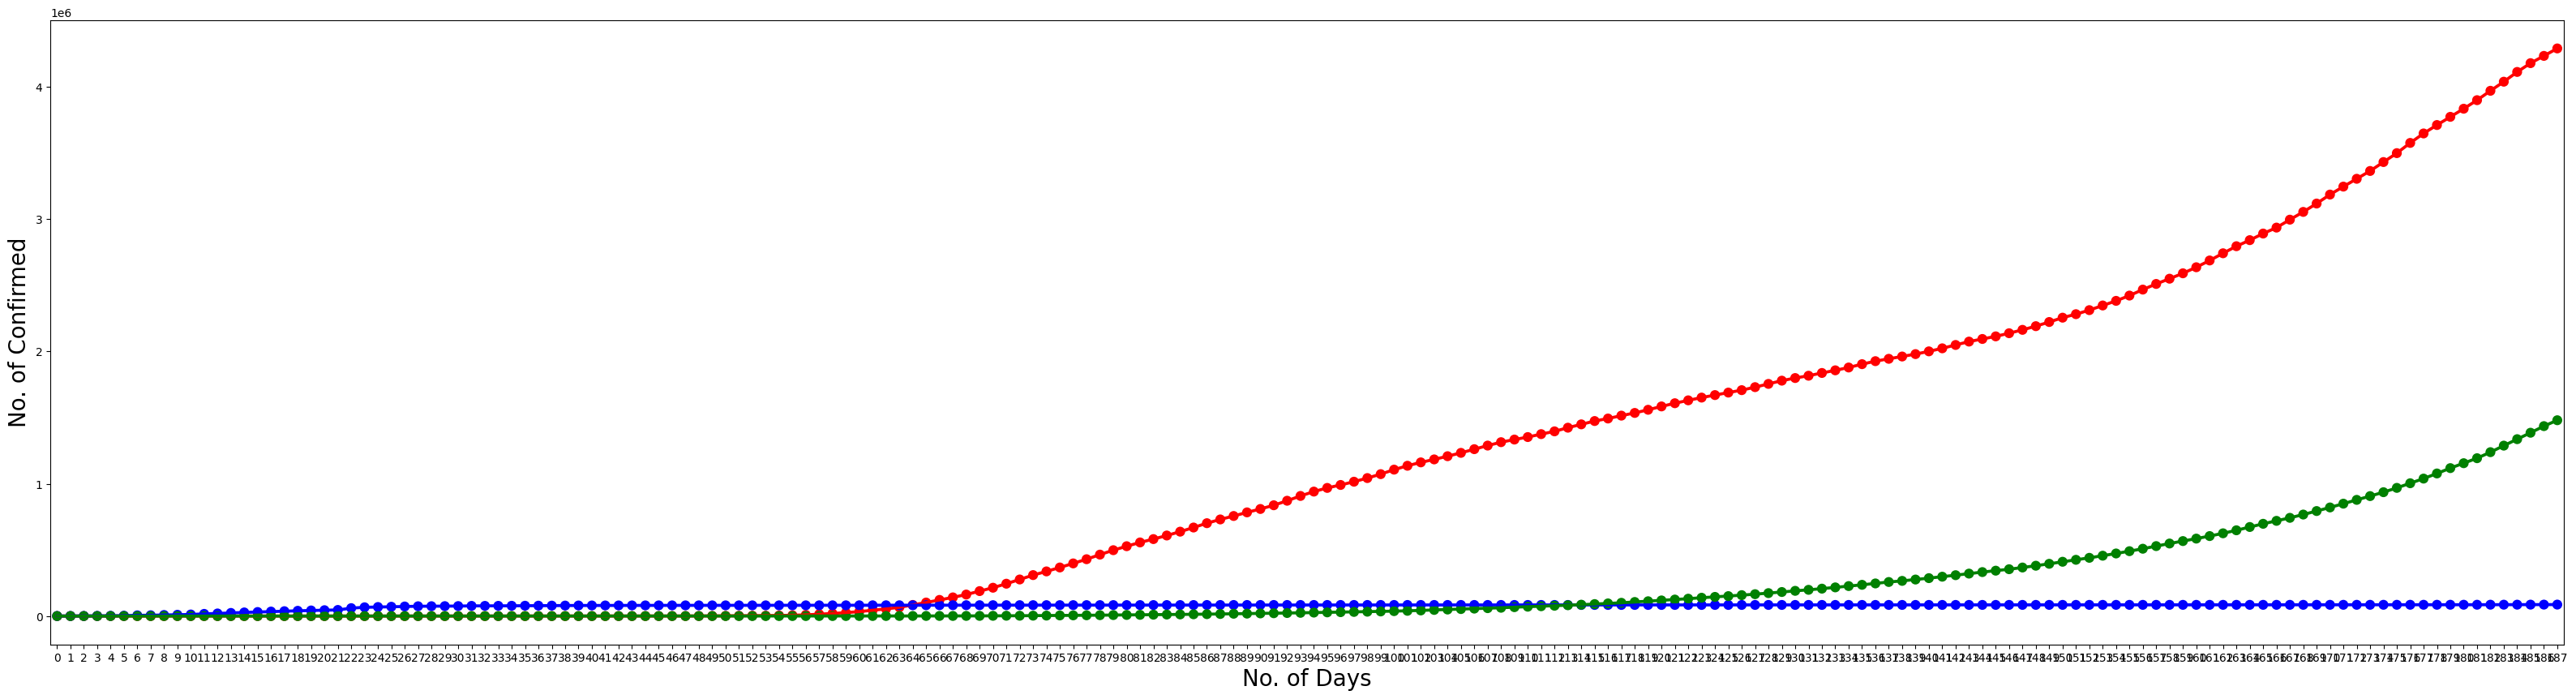

In [ ]:
plt.figure(figsize=(40,10))

sns.pointplot(x=us.index, y = us.Confirmed, color = 'Red')
sns.pointplot(x=china.index, y=china.Confirmed, color = 'Blue')
sns.pointplot(x=india.index, y=india.Confirmed, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Confirmed', fontsize = 20)

# Model Building

In [ ]:
!pip install prophet

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv', parse_dates=['Date'])

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
confirmed = df.groupby(by='Date').sum()['Confirmed'].reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
deaths = df.groupby(by='Date').sum()['Deaths'].reset_index()

In [ ]:
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
recovered = df.groupby(by='Date').sum()['Recovered'].reset_index()

In [ ]:
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
active = df.groupby(by='Date').sum()['Active'].reset_index()

In [ ]:
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


# Forecasting for confirmed cases

In [ ]:
confirmed.columns = ['ds','y']

In [ ]:
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfob37q6/0ug2kzhb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfob37q6/gbv_kue8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95668', 'data', 'file=/tmp/tmpzfob37q6/0ug2kzhb.json', 'init=/tmp/tmpzfob37q6/gbv_kue8.json', 'output', 'file=/tmp/tmpzfob37q6/prophet_modelfkt18pxt/prophet_model-20231121094441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=7)

In [ ]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.279443e+05,7.313638e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.094244e+05,9.373637e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.991811e+04,1.079112e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.737275e+04,1.146724e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.010777e+05,1.188762e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663432e+07,1.685361e+07,1.673949e+07,1.675288e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685014e+07,1.707111e+07,1.693762e+07,1.696527e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705485e+07,1.728183e+07,1.713424e+07,1.717772e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724857e+07,1.747629e+07,1.733037e+07,1.738882e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.067684e+04,7.313638e+04,-1.279443e+05
1,2020-01-23,-8.050948e+03,9.373637e+04,-1.094244e+05
2,2020-01-24,5.827455e+03,1.079112e+05,-9.991811e+04
3,2020-01-25,1.217668e+04,1.146724e+05,-9.737275e+04
4,2020-01-26,8.405020e+03,1.188762e+05,-1.010777e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.685361e+07,1.663432e+07
191,2020-07-31,1.695910e+07,1.707111e+07,1.685014e+07
192,2020-08-01,1.716676e+07,1.728183e+07,1.705485e+07
193,2020-08-02,1.736430e+07,1.747629e+07,1.724857e+07


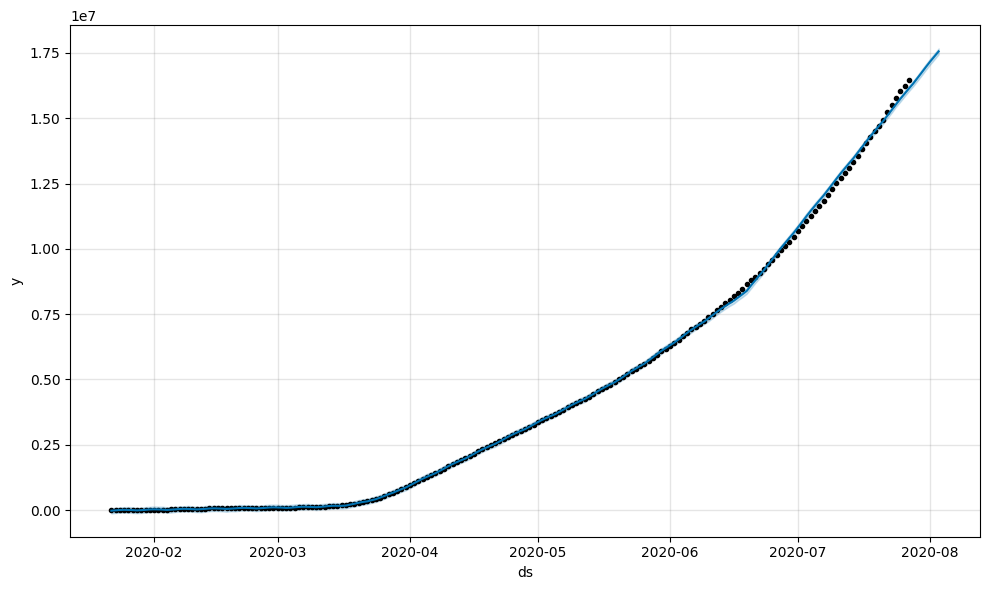

In [ ]:
m.plot(forecast)
plt.show()

In [ ]:
import plotly
import plotly.express as px

In [ ]:
world = df.groupby(by='Country/Region')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()

In [ ]:
world

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [ ]:
figure = px.choropleth(world,locations='Country/Region',
                        locationmode = 'country names',
                        color='Active',
                        hover_name='Country/Region', range_color=[1,20000],
                        color_continuous_scale='reds',
                        title='Countries with Active Cases')
figure.show()